# TP3 Taillandier - Monnot
## Exercice 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

### a) Calculate and display the displacement, velocity and acceleration of the system. And display it.

In [25]:
v0 = 4 * 0.01
k = 200
x0 = 0
m = 0.0625
w0 = math.sqrt(k / m)
fs = 100
samples = fs * 2

A = math.sqrt(x0**2 + (v0/w0)**2)
phase =  0 # np.arctan(v0 / (x0 * w0)) = 0

t = np.linspace(0, 2, samples)
y = A * np.sin(w0 * t + phase)

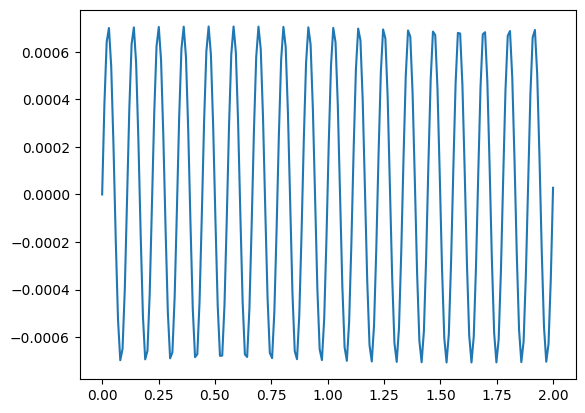

In [26]:
plt.plot(t, y)
plt.show()

### b) Implement a function « free_response » that takes the mass 𝑚, the stiffness 𝑘 , the time axis 𝑡 and the initial conditions 𝑥0=0and 𝑣0=4𝑐𝑚𝑠⁄, and returns the displacement of the free response 𝑥(𝑡) 

In [27]:
def free_response(mass, stifness, time):
    samples = fs * time
    w0 = math.sqrt(stifness / mass)
    t = np.linspace(0, 2, samples)
    try:
        phase = np.arctan(v0 / (x0 * w0))
    except:
        phase = 0
    return t, A * np.sin(w0 * t + phase)
        

### i. Evaluate the response for For m=60g and k=200 N/m. Use the same initial conditions as before 

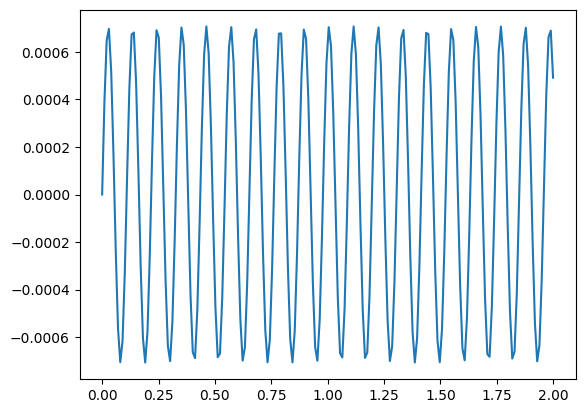

In [28]:
t, y = free_response(0.06, 200, 2)
plt.plot(t, y)
plt.show()

#### On peut observer la phase de montante puis descendante. La courbe est sensiblement la même que dans la première question (Seulement 2.5g de différence)

### ii. Display the responses for different mass (m=30,60 and 100g) for the same k=400 (this can be easily calculated). How the mass affects the response ?

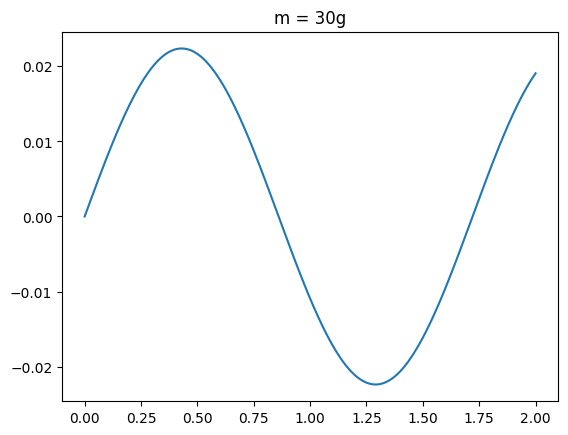

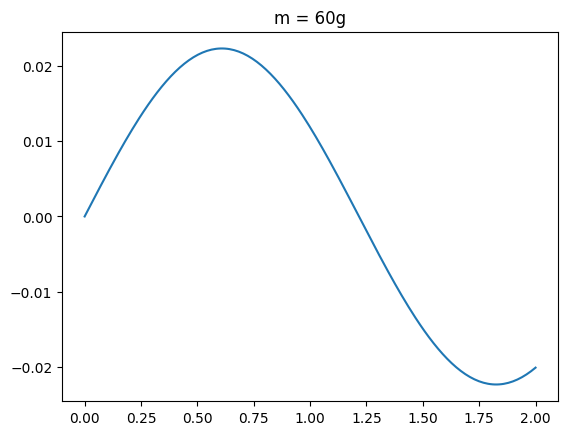

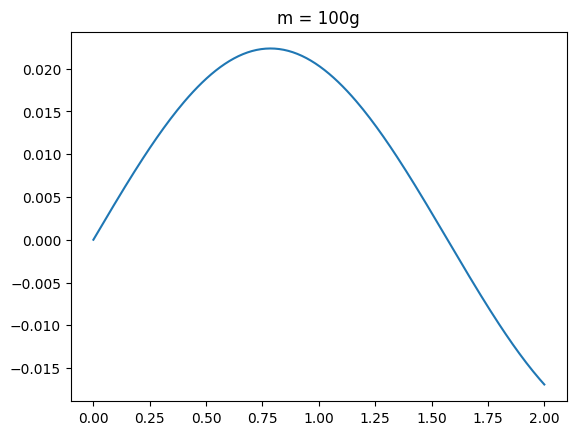

In [23]:
t, y = free_response(0.03, 400, 2)
plt.plot(t, y)
plt.title("m = 30g")
plt.show()

t, y = free_response(0.06, 400, 2)
plt.plot(t, y)
plt.title("m = 60g")
plt.show()

t, y = free_response(0.1, 400, 2)
plt.plot(t, y)
plt.title("m = 100g")
plt.show()

####  On peut observer que plus la masse augmente plus le rebond est tardif.

### iii.  Display the responses for different stiffness (k=100, 200 and 400 N/m). How the stiffness affects the response ? 

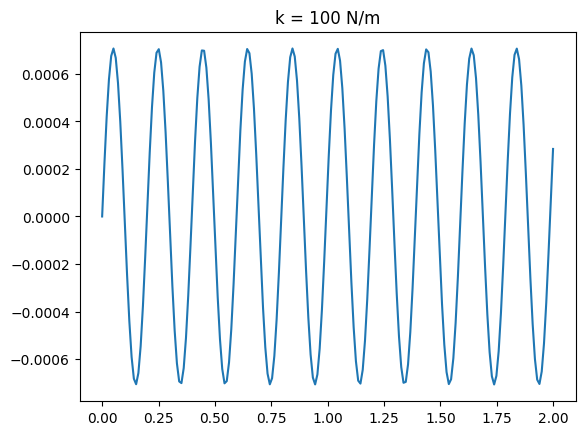

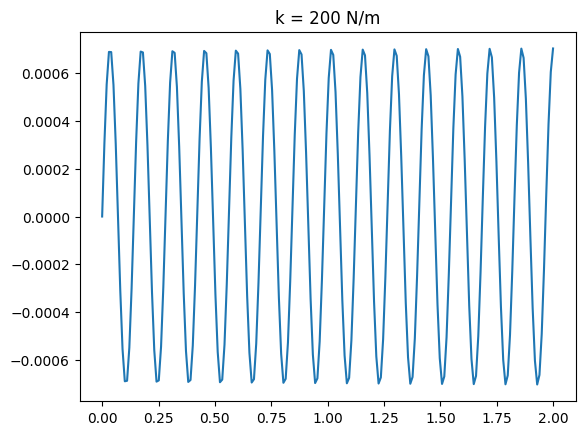

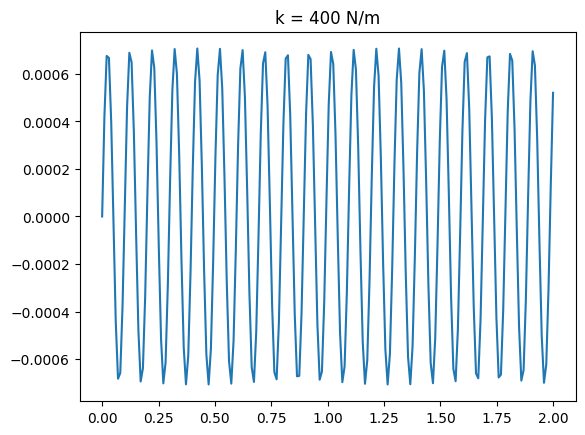

In [29]:
t, y = free_response(0.1, 100, 2)
plt.plot(t, y)
plt.title("k = 100 N/m")
plt.show()

t, y = free_response(0.1, 200, 2)
plt.plot(t, y)
plt.title("k = 200 N/m")
plt.show()

t, y = free_response(0.1, 400, 2)
plt.plot(t, y)
plt.title("k = 400 N/m")
plt.show()

#### Plus la rigidité du ressort augmente plus la réponse varie. En effet avec une raideure plus importante, le ressort à le temps de se contracter et de se décontracter plus pour une même période (fréquence plus élevé). 

## Exercice 2
### a) Calculate and display the displacement.

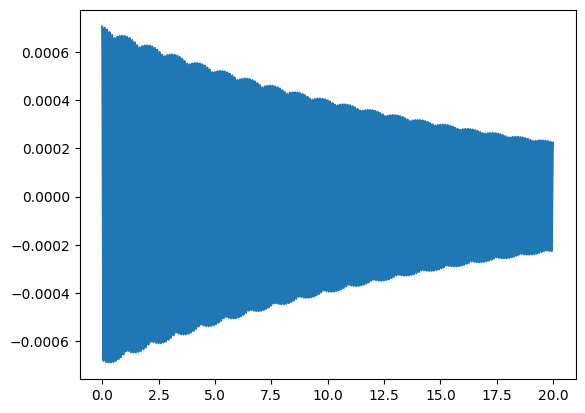

In [57]:
m = 0.0625
fs = 100
k = 200
g = 9.8
damping = 0.001
samples = fs * 20

w0 = math.sqrt(k / m)
wd = w0 * math.sqrt(1 - damping**2)
t = np.linspace(0, 20, samples)
y = A * np.exp(-damping * w0 * t) * np.cos(wd * t + phase)

plt.plot(t, y)
plt.show()

### b) Implement a function « free_response_damping » that take the mass, the stiffness, the damping factor and the initial conditions 𝑥0and 𝑣0, and returns the free response (i.e. the displacement 𝑥(𝑡)) 

In [40]:
def free_response_damping(mass, stifness, damping, time):
    samples = fs * time
    w0 = math.sqrt(stifness / mass)
    wd = w0 * math.sqrt(1 - damping**2)
    t = np.linspace(0, time, samples)
    y = A * np.exp(-damping * w0 * t) * np.cos(wd * t + phase)
    return t, y    

### i. Display the solution for different damping factor 𝜉=0.2,0.1,0.02. Display the results between t=0 and t=20. Comment the results. 

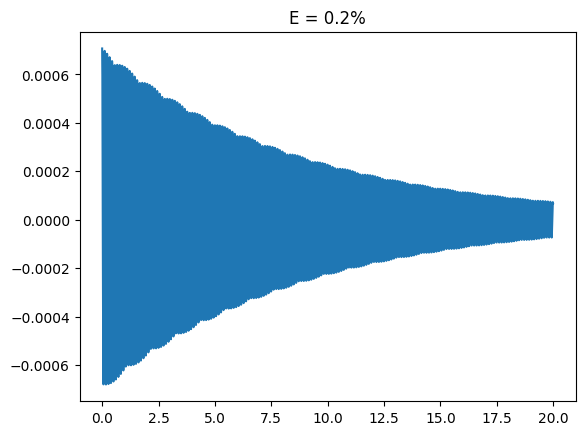

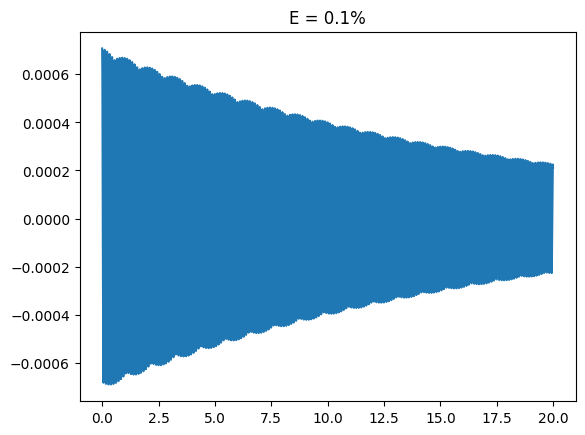

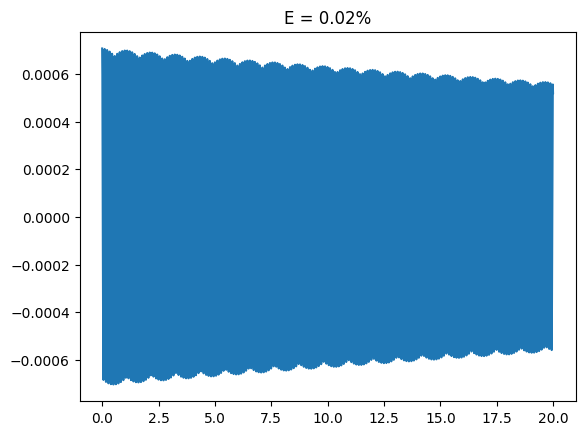

In [58]:
t, y = free_response_damping(0.0625, 200, 0.002, 20)
plt.plot(t, y)
plt.title("E = 0.2%")
plt.show()

t, y = free_response_damping(0.0625, 200, 0.001, 20)
plt.plot(t, y)
plt.title("E = 0.1%")
plt.show()

t, y = free_response_damping(0.0625, 200, 0.0002, 20)
plt.plot(t, y)
plt.title("E = 0.02%")
plt.show()

#### Lorsque l'amortissement diminue, on observe une augmentation de l'amplitude dans la durée puisqu'elle est de moins en moins amorti. C'est ce que l'on appelle une "Underdamping". Cela s'explique car E^2 < 1

## Exercice 3

### Calculate and display the displacement of the system.

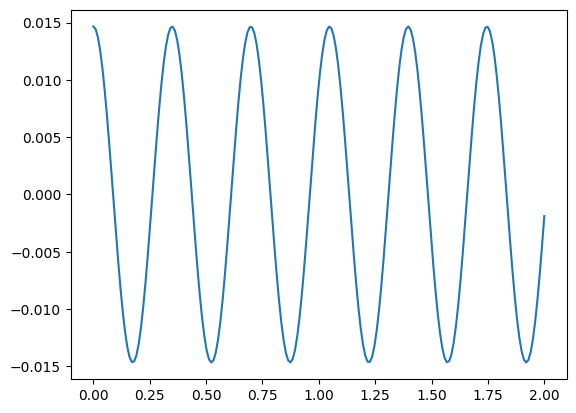

In [62]:
m = 0.0625
k = 200
fs = 100
E = 0.001
time = 2
samples = fs * time
t = np.linspace(0, time, samples)
w = 18
Af = 2
phaseF = 0
w0 = math.sqrt(k / m)
wr = w / w0
magnitude = (1 / k) / math.sqrt((1 - wr)**2 + (2 * E * wr)**2)
phaseH = np.arctan((2 * E * wr) / ((wr)**2 - 1))
displacement = magnitude * Af * np.cos(w * t + phaseF + phaseH) 

plt.plot(t, displacement)
plt.show()

### b) Implement a function « Forced_response_damping » that take the mass, the stiffness, the damping factor, the amplitude 𝐹0 and the angular frequency 𝜔 of a cosine forcing function 𝐹(𝑡)=𝐹0𝑐𝑜𝑠(𝜔𝑡), and returns the Forced response (i.e. the displacement 𝑥(𝑡)) 

In [65]:
def Forced_response_damping(mass, stiffness, wr, Af, w):
    samples = fs * 2
    t = np.linspace(0, 2, samples)
    magnitude = (1 / k) / math.sqrt((1 - wr)**2 + (2 * E * wr)**2)
    phaseH = np.arctan((2 * E * wr) / ((wr)**2 - 1))
    displacement = magnitude * Af * np.cos(w * t + phaseF + phaseH) 
    return t, displacement

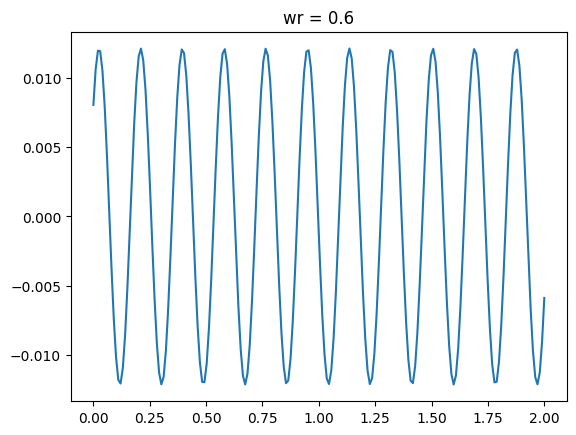

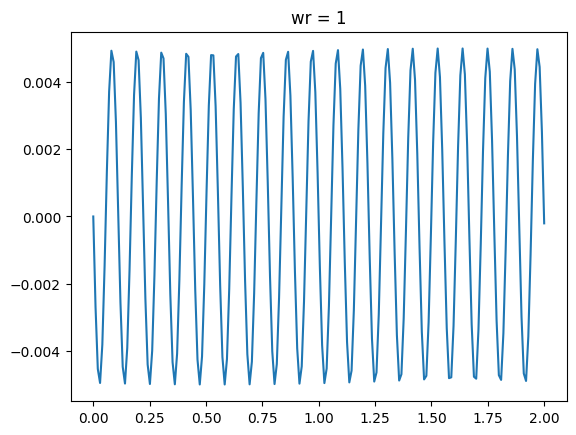

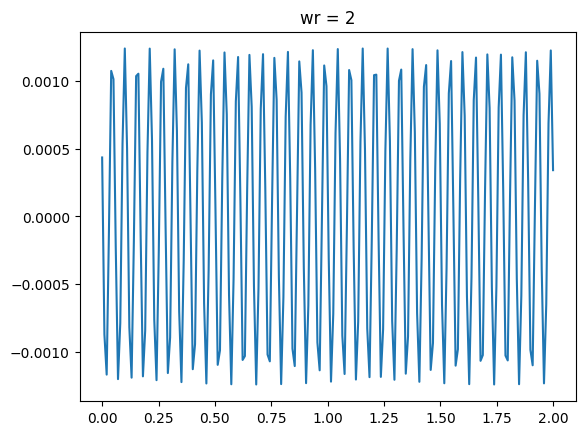

In [73]:
m = 0.0625
k = 200
Af = 2
w0 = math.sqrt(k / m)


wr = 0.6
w = wr * w0
t, y = Forced_response_damping(m, k, wr, Af, w)
plt.plot(t, y)
plt.title("wr = 0.6")
plt.show()
 
wr = 1.00001 # Pour éviter la division par 0 -> (wr)**2 - 1
w = wr * w0
t, y = Forced_response_damping(m, k, wr, Af, w)
plt.plot(t, y)
plt.title("wr = 1")
plt.show()

wr = 2
w = wr * w0
t, y = Forced_response_damping(m, k, wr, Af, w)
plt.plot(t, y)
plt.title("wr = 2")
plt.show()


#### On peut observer qu'avec wr augmentant, le signal se perturbe. On observe également une variation de l'amplitude ainsi qu'une variation de la phase.